In [37]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X_data = np.load('Sign-language-digits-dataset/X.npy')
Y_data = np.load('Sign-language-digits-dataset/Y.npy')

(410, 64, 64)
(410, 1)


(-0.5, 63.5, 63.5, -0.5)

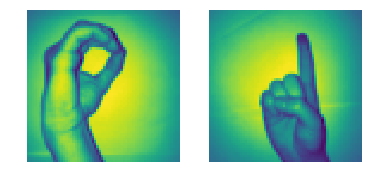

In [15]:
X_zeros = X_data[204:409]
X_ones = X_data[822:1027]

Y_zeros = np.zeros(205)
Y_ones = np.ones(205)

X = np.concatenate((X_zeros, X_ones), axis=0)
Y = np.concatenate((Y_zeros, Y_ones), axis=0).reshape(X.shape[0], 1)

print(X.shape)
print(Y.shape)

plt.subplot(1, 2, 1)
plt.imshow(X_zeros[0])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_ones[0])
plt.axis('off')

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2]).T
X_test = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2]).T
Y_train = Y_train.T
Y_test = Y_test.T

print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", Y_train.shape)
print("y test: ", Y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [52]:
def sigmoid(z):
    Y_head = 1/(1 + np.exp(-z))
    return Y_head

def sigmoid_der(Y_head):
    derivative = np.multiply(Y_head, (1 - Y_head))
    return derivative

def binary_cross_entropy(Y_train, Y_head):
    loss = -Y_train * np.log(Y_head) - (1 - Y_train) * np.log(1 - Y_head)
    return loss

def binary_cross_entropy_der_by_sigmoid(X_train, Y_train, Y_head):    
    weights_der = (np.dot(X_train, ((Y_head - Y_train).T)))/X_train.shape[1]
    bias_der = np.sum(Y_head - Y_train)/X_train.shape[1]
    return weights_der, bias_der

In [65]:
def initialize_weights_and_bias(dimension):
    # w = np.random.rand(dimension, 1)
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

def forward_prop(w, b, X_train, Y_train):
    z = np.dot(w.T, X_train) + b
    Y_head = sigmoid(z)
    loss = binary_cross_entropy(Y_train, Y_head)
    cost = (np.sum(loss))/X_train.shape[1] # Y_train.shape[1] для нормализации
    return Y_head, cost

def backward_prop(X_train, Y_train, Y_head):
    weights_der, bias_der = binary_cross_entropy_der_by_sigmoid(X_train, Y_train, Y_head)
    return weights_der, bias_der

In [60]:
def predict(w, b, X_test):
    z = sigmoid(np.dot(w.T, X_test) + b)
    Y_prediction = np.zeros((1, X_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

In [49]:
def logistic_regression(X_train, X_test, Y_train, Y_test, learning_rate, num_iterations):
    w, b = initialize_weights_and_bias(X_train.shape[0])
    
    cost_list = []
    index = []
    
    for it in range(num_iterations):
        Y_head, cost = forward_prop(w, b, X_train, Y_train)
        weights_der, bias_der = backward_prop(X_train, Y_train, Y_head)
        
        # update weigths and bias
        w = w - learning_rate * weights_der
        b = b - learning_rate * bias_der
        
        if it % 10 == 0:            
            cost_list.append(cost)
            index.append(it)
            print("Ошибка после %i итерации: %f" %(it, cost))            
    
    parameters = {"weights": w,"bias": b}
    plt.plot(index, cost_list)
    # plt.xticks(index, rotation='vertical')
    plt.xlabel("Итерация")
    plt.ylabel("Ошибка")
    plt.show()
    
    return parameters, cost_list

Ошибка после 0 итерации: 14.014222
Ошибка после 10 итерации: 4.145042
Ошибка после 20 итерации: 2.452003
Ошибка после 30 итерации: 1.916513
Ошибка после 40 итерации: 2.019878
Ошибка после 50 итерации: 2.161673
Ошибка после 60 итерации: 2.310249
Ошибка после 70 итерации: 2.380660
Ошибка после 80 итерации: 2.244609
Ошибка после 90 итерации: 1.926348
Ошибка после 100 итерации: 1.255284
Ошибка после 110 итерации: 0.282154
Ошибка после 120 итерации: 0.194603
Ошибка после 130 итерации: 0.183633
Ошибка после 140 итерации: 0.173899


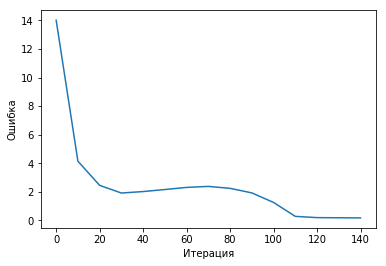

Точность на тренировочной выборке: 92.816091954023 %
Точность на тестовой выборке: 95.16129032258064 %


In [66]:
parameters, cost_list = logistic_regression(X_train, X_test, Y_train, Y_test, learning_rate = 0.02, num_iterations = 150)

y_prediction_test = predict(parameters["weights"], parameters["bias"], X_test)
y_prediction_train = predict(parameters["weights"], parameters["bias"], X_train)

print("Точность на тренировочной выборке: {} %".format(100 - np.mean(np.abs(y_prediction_train - Y_train)) * 100))
print("Точность на тестовой выборке: {} %".format(100 - np.mean(np.abs(y_prediction_test - Y_test)) * 100))